### Import Libraries

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

%matplotlib inline

### Read - Display Image

In [2]:
# Read the image
image = cv2.imread('Images/car.jpg')

# Print the type of the image
# The dimensions (height, width, color)
# We'll nedd the dimensions later
print('This is the image type:', type(image),' with dimentions:', image.shape)

This is the image type: <class 'numpy.ndarray'>  with dimentions: (450, 660, 3)


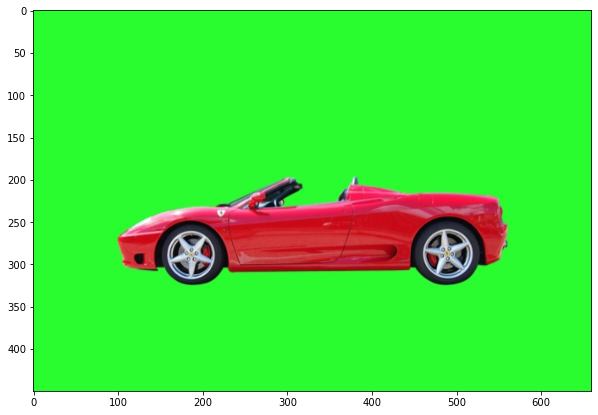

In [3]:
# Make a copy of the image
img_copy = np.copy(image)

# Change the color from BGR to RGB
image_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize = (12, 7))
plt.imshow(image_copy);

## Define Color Threshold

In [4]:
# Isolate the Green Background
# Try it by yourselves. Change the values to getyour best result!
lower_green = np.array([0, 200, 0])
upper_green = np.array([250, 255, 250])

## Creat the Mask

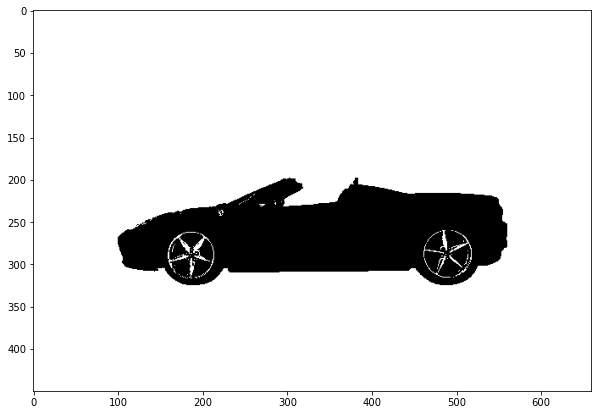

In [5]:
# Define the Masked Area
mask = cv2.inRange(image_copy,
                   lower_green,
                   upper_green)

# Visualize the Mask on the imgae
plt.figure(figsize = (12, 7))
plt.imshow(mask, cmap = 'gray');

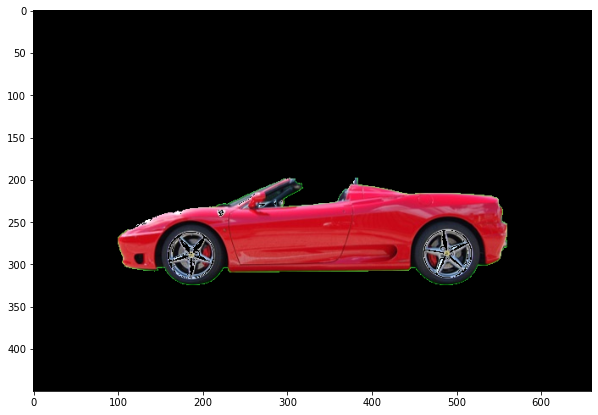

In [6]:
# Mask the Image to let your object come and show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Dispaly the Image
plt.figure(figsize = (12, 7))
plt.imshow(masked_image);

## Mask and Add a Background Image

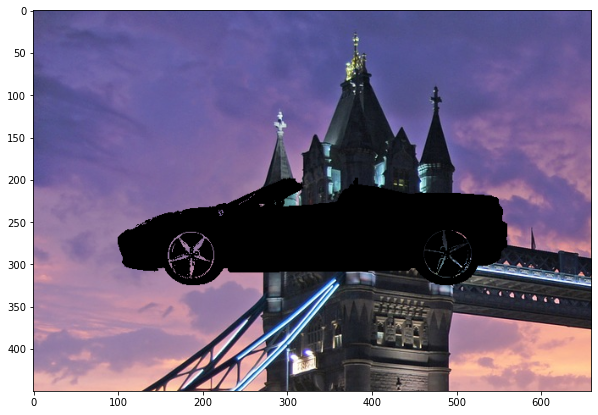

In [7]:
# Load the Image Background
blackground_image = cv2.imread('Images/london.jpg')

# Convert it from BGR to RGB
blackground_image = cv2.cvtColor(blackground_image, 
                                cv2.COLOR_BGR2RGB)

# Crop it to the the dimensions we got
crop_blackground = blackground_image[0:450, 0:660]

# Mask the Cropped Background
# That's how the object's area is blocked
crop_blackground[mask == 0] = [0, 0, 0]

# Display the Background
plt.figure(figsize = (12, 7))
plt.imshow(crop_blackground);

## Let's move it

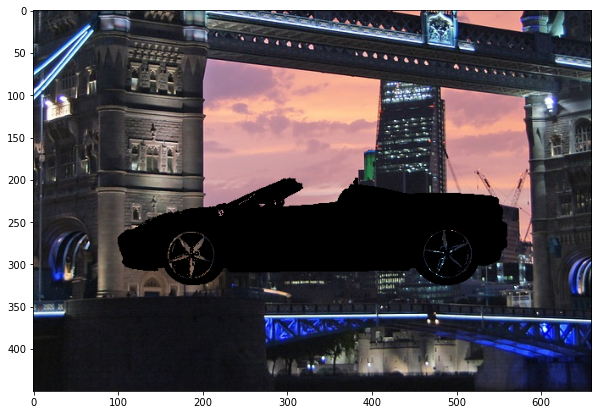

In [8]:
# x, y, h, w
x = 290
y = 300
h = 450
w = 660

# Convert it from BGR to RGB
blackground_image = cv2.imread('Images/london.jpg')
blackground_image = cv2.cvtColor(blackground_image, 
                                cv2.COLOR_BGR2RGB)


# Crop it to the the dimensions we got
crop_blackground = blackground_image[y : y + h, x : x + w]


# Mask the Cropped Background
# That's how the object's area is blocked
crop_blackground[mask == 0] = [0, 0, 0]

# Display the Background
plt.figure(figsize = (12, 7))
plt.imshow(crop_blackground);

# Add them together and get the Final Image

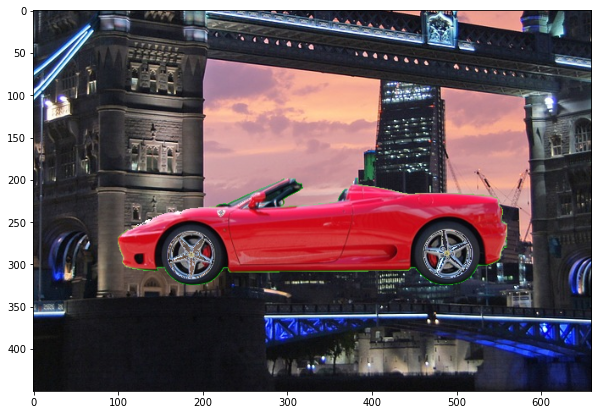

In [9]:
# Add 
complet_image = masked_image + crop_blackground


plt.figure(figsize = (12, 7))
plt.imshow(complet_image);